In [1]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import animation

Defino dos mallas `x` y `y` con las dimensiones del arreglo `s` que se quiere graficar usando `pcolormesh`.

In [2]:
dx, dy = 2/192., 1/96.

x, y = np.mgrid[slice(0, 2, dx), slice(0, 1, dy)]

## Extraer datos

In [4]:
def extraer_datos(nombre_h5):

    with h5py.File(nombre_h5, flag ='r') as hdf:
        base_items = list(hdf.items())
        print(base_items, '\n')
        tasks = hdf.get('tasks')
        tasks_items = list(tasks.items())
        print(tasks_items)

        s = np.array(tasks.get('s'))
        print(s.shape)

        s_profile= np.array(tasks.get('s profile'))
        print(s_profile.shape)

        u = np.array(tasks.get('u'))
        print(u.shape)
        
    return s, s_profile, u

## Animación

La función `animar_dedalus` crea una animación de los datos extraidos del archivo `HDF5`.

In [5]:
def animar_dedalus(xm, ym, S, CMAP):
    fig, axis = plt.subplots(figsize=(10,5))
    p = axis.pcolormesh(xm, ym, S[0,:,:], cmap=CMAP)

    def init():
                print('update init')
                p.set_array(np.ravel(S[0,:-1,:-1]))
                return p

    def update(frame):
        p.set_array(np.ravel(S[frame, :-1, :-1]))
        return p

    anim = animation.FuncAnimation(fig, update, frames= [i for i in range(1,len(S))], init_func=init,  blit = False)
    plt.show()
    return anim

## Primer caso

Tomé el ejemplo de la inestabilidad de Kelvin-HelmHoltz que viene en la página de [Dedalus](http://nbviewer.jupyter.org/urls/bitbucket.org/dedalus-project/dedalus/raw/tip/docs/notebooks/KelvinHelmholtzInstability.ipynb), con un perfil de velocidades $u(x,y) = 0.5 \ tanh \Big(\frac{y}{0.05} \Big)$.

In [17]:
with h5py.File("Ui_tanh/Ui_tanh_s1/Ui_tanh_s1_p0.h5", flag ='r') as hdf:
    base_items = list(hdf.items())
    print(base_items, '\n')
    tasks = hdf.get('tasks')
    tasks_items = list(tasks.items())
    print(tasks_items)
    
    s_tanh = np.array(tasks.get('s'))
    print(s_tanh.shape)
    
    s_tanh_profile= np.array(tasks.get('s profile'))
    print(s_tanh_profile.shape)
    
    u_tanh = np.array(tasks.get('u'))
    print(u_tanh.shape)

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (3 members)>)] 

[('s', <HDF5 dataset "s": shape (41, 192, 96), type "<f8">), ('s profile', <HDF5 dataset "s profile": shape (41, 1, 96), type "<f8">), ('u', <HDF5 dataset "u": shape (41, 192, 96), type "<f8">)]
(41, 192, 96)
(41, 1, 96)
(41, 192, 96)


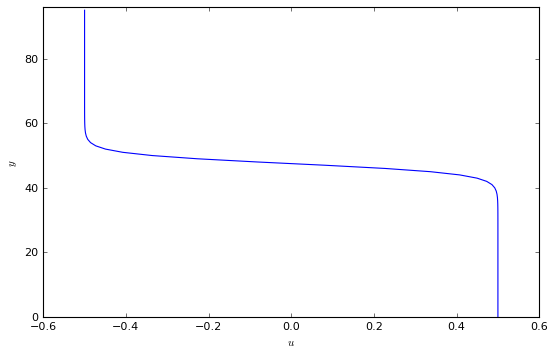

In [31]:
plt.figure(figsize=(8,5))
plt.plot(u_tanh[0, 96, :], range(0,96))
plt.ylim(0,96)
plt.xlabel('$u$')
plt.ylabel('$y$')

update init


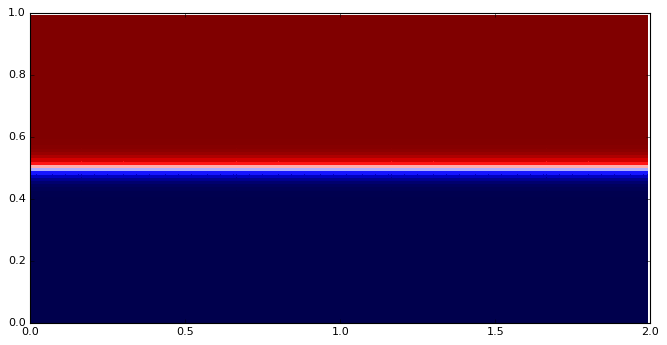

update init


In [34]:
anima_tanh = animar_dedalus(x, y, s_tanh, 'seismic')
mywriter = animation.FFMpegWriter()
anima_tanh.save('K-H_ui_tanh.mp4',writer=mywriter, fps=30)

## Segundo caso

In [37]:
s_punta, s_punta_prof, u_punta = extraer_datos('Ui_punta/Ui_punta_s1/Ui_punta_s1_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (3 members)>)] 

[('s', <HDF5 dataset "s": shape (41, 192, 96), type "<f8">), ('s profile', <HDF5 dataset "s profile": shape (41, 1, 96), type "<f8">), ('u', <HDF5 dataset "u": shape (41, 192, 96), type "<f8">)]
(41, 192, 96)
(41, 1, 96)
(41, 192, 96)


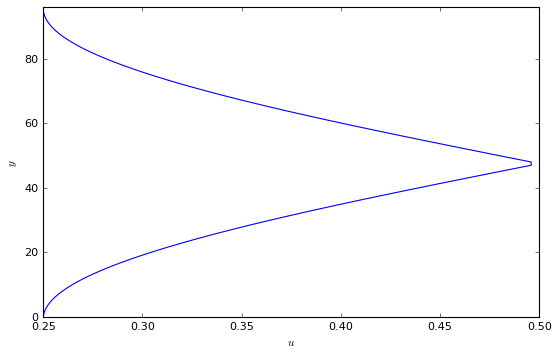

In [45]:
plt.figure(figsize=(8,5))
plt.plot(u_punta[0, 96, :], range(0,96))
plt.ylim(0,96)
plt.xlabel('$u$')
plt.ylabel('$y$')

update init


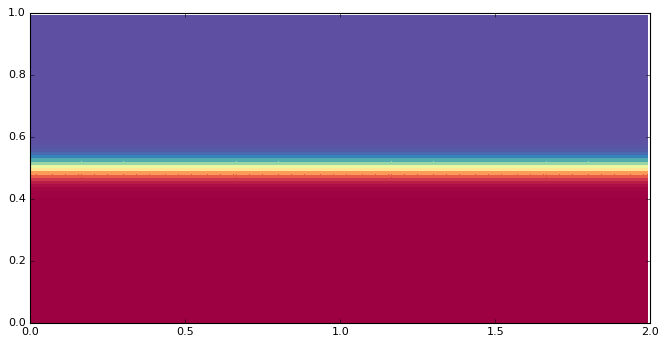

update init


In [40]:
anima_punta = animar_dedalus(x, y, s_punta, 'Spectral')
mywriter = animation.FFMpegWriter()
anima_punta.save('K-H_ui_punta.mp4',writer=mywriter, fps=30)

## Tercer caso

In [9]:
u_prueba = np.zeros_like(y)

for i in range(0, 192):
    for j in range(0, 96):
        
        if j < 48:
            u_prueba[i, j] = y[i, j] * 0.5
        
        elif j >= 48:
            u_prueba[i,j] =  y[i,j] *0.5/2 - y[i, 48] *0.5
     

u_prueba

array([[ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417],
       [ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417],
       [ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417],
       ..., 
       [ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417],
       [ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417],
       [ 0.        ,  0.00520833,  0.01041667, ..., -0.0078125 ,
        -0.00520833, -0.00260417]])

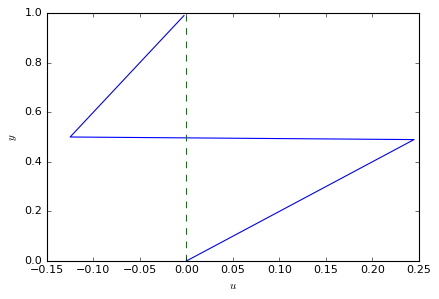

In [10]:
plt.plot(u_prueba[20,:], y[1,:])
plt.plot(np.zeros(96), y[1,:], "--")
plt.xlabel('$u$')
plt.ylabel('$y$')

In [132]:
s_hs, s_hs_prof, u_hs = extraer_datos('Ui_half_shear/Ui_half_shear_s1/Ui_half_shear_s1_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (3 members)>)] 

[('s', <HDF5 dataset "s": shape (41, 192, 96), type "<f8">), ('s profile', <HDF5 dataset "s profile": shape (41, 1, 96), type "<f8">), ('u', <HDF5 dataset "u": shape (41, 192, 96), type "<f8">)]
(41, 192, 96)
(41, 1, 96)
(41, 192, 96)


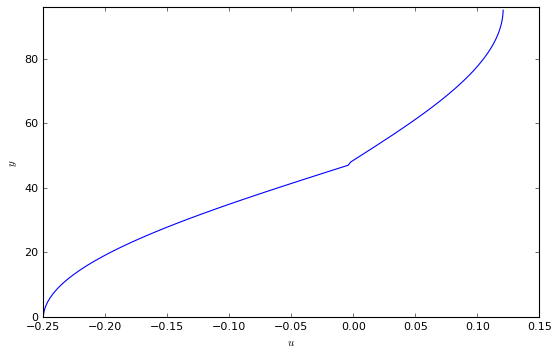

In [133]:
plt.figure(figsize=(8,5))
plt.plot(u_hs[0, 96, :], range(0,96))
plt.ylim(0,96)
plt.xlabel('$u$')
plt.ylabel('$y$')

update init


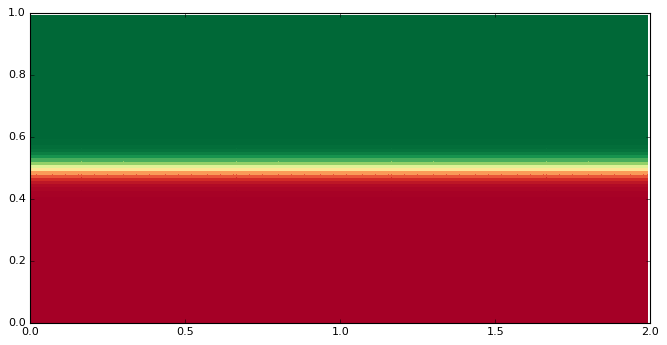

update init


In [134]:
anima_punta = animar_dedalus(x, y, s_hs, 'RdYlGn')
mywriter = animation.FFMpegWriter()
anima_punta.save('K-H_ui_sh.mp4',writer=mywriter, fps=30)

## Cuarto caso

In [135]:
s_hiperbola, s_hiperbola_prof, u_hiperbola = extraer_datos('Ui_hiperbola/Ui_hiperbola_s1/Ui_hiperbola_s1_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (3 members)>)] 

[('s', <HDF5 dataset "s": shape (25, 192, 96), type "<f8">), ('s profile', <HDF5 dataset "s profile": shape (25, 1, 96), type "<f8">), ('u', <HDF5 dataset "u": shape (25, 192, 96), type "<f8">)]
(25, 192, 96)
(25, 1, 96)
(25, 192, 96)


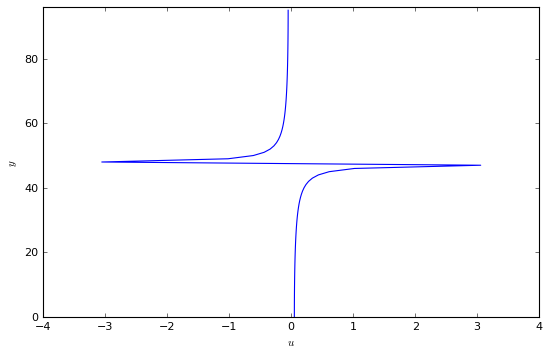

In [138]:
plt.figure(figsize=(8,5))
plt.plot(u_hiperbola[0, 96, :], range(0,96))
plt.ylim(0,96)
plt.xlabel('$u$')
plt.ylabel('$y$')

update init


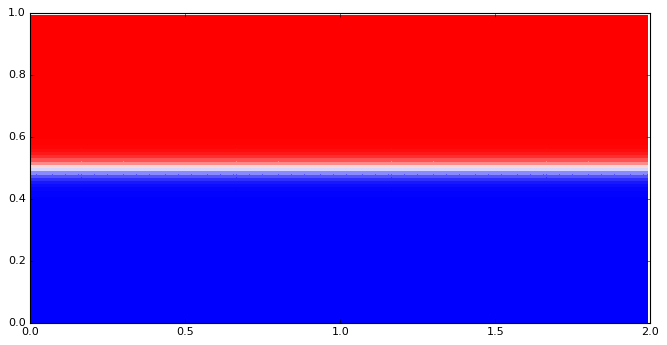

update init


In [139]:
anima_punta = animar_dedalus(x, y, s_hiperbola, 'bwr')
mywriter = animation.FFMpegWriter()
anima_punta.save('K-H_ui_hiperbola.mp4',writer=mywriter, fps=30)

## Quinto caso

In [140]:
s_abs_hip, s_abs_hip_prof, u_abs_hip = extraer_datos('Ui_abs_hiperb/Ui_abs_hiperb_s1/Ui_abs_hiperb_s1_p0.h5')

[('scales', <HDF5 group "/scales" (10 members)>), ('tasks', <HDF5 group "/tasks" (3 members)>)] 

[('s', <HDF5 dataset "s": shape (37, 192, 96), type "<f8">), ('s profile', <HDF5 dataset "s profile": shape (37, 1, 96), type "<f8">), ('u', <HDF5 dataset "u": shape (37, 192, 96), type "<f8">)]
(37, 192, 96)
(37, 1, 96)
(37, 192, 96)


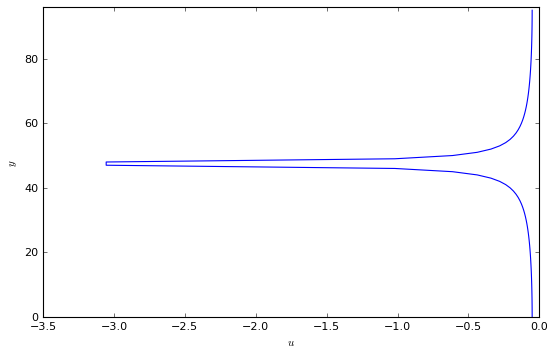

In [141]:
plt.figure(figsize=(8,5))
plt.plot(u_abs_hip[0, 96, :], range(0,96))
plt.ylim(0,96)
plt.xlabel('$u$')
plt.ylabel('$y$')

update init


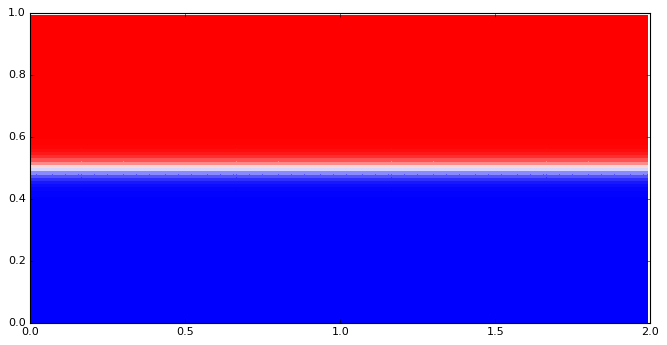

update init


In [142]:
anima_punta = animar_dedalus(x, y, s_abs_hip, 'bwr')
mywriter = animation.FFMpegWriter()
anima_punta.save('K-H_ui_abshiper.mp4',writer=mywriter, fps=30)